In [21]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:.11e}'.format)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from pathlib import Path
from combat.pycombat import pycombat

from ete3 import NCBITaxa
import tabulate
import numpy as np
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings("ignore")

np.random.seed(0)

In [2]:
datadir = "centrifuge_data"

In [3]:
ncbi = NCBITaxa()

NCBI database not present yet (first time used?)


PermissionError: [Errno 13] Permission denied: '/home/lxi/.etetoolkit'

In [4]:
# Define a function to convert numeric column names to string representations
def numeric_to_string(column_name):
    try:
        # Translate taxonomic ID to string
        return ncbi.get_taxid_translator([int(column_name)])[int(column_name)]
    except ValueError:
        # If column name cannot be converted to int, return as is
        return column_name
    except KeyError:
        # If taxid is not found, return 'Unknown'
        return 'Unknown'


### Clean the data in each dataframe and add the disease status of each sample  

In [5]:
# Read in abundance data and set sample as index
df_feng = pd.read_csv(datadir + '/centrifuge_abundance_feng.csv', header=0).reset_index(drop=True)
df_feng.rename(columns={df_feng.columns[0]: 'Sample'}, inplace=True)
Feng_df = df_feng.set_index('Sample')

# Read in metadata and clean it up
feng_meta = pd.read_csv("meta_data/metadata_feng.csv", header=0).reset_index(drop=True)
feng_meta = feng_meta.rename(columns={feng_meta.columns[3]: 'X3'})  # Renaming unnamed column to 'X3'

# Change 'carcinoma' to 'CRC' and 'controls' to 'CTC'
feng_meta['X3'] = feng_meta['X3'].replace({'carcinoma': 'CRC', 'controls': 'CTC'})
feng_meta['status'] = feng_meta['X3']
Feng_df = Feng_df.reset_index()
Feng_df['status'] = feng_meta['X3']

# Exclude adenoma samples
Feng_df = Feng_df[Feng_df['status'] != 'advanced adenoma']

Feng_df = Feng_df.set_index('Sample')
Feng_df.fillna(0, inplace=True)
Feng_df.columns.astype(str)

# Convert each numeric column name into string representation using the numeric_to_string function
# Feng_df.columns = [numeric_to_string(column) for column in Feng_df.columns]

# Display first few rows of Feng_df
Feng_df.head()

,24,162,195,197,199,200,204,210,253,259,...,2597770,2599293,2599308,2603276,2603292,2603296,2605619,2605620,2609668,status
Sample,,,,,,,,,,,,,,,,,,,,,
ERR688505,0.00000000000e+00,0.00000000000e+00,5.33155000000e-04,1.82055000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.97045000000e-07,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
ERR688506,0.00000000000e+00,0.00000000000e+00,3.75351000000e-05,1.01813000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.99087000000e-55,0.00000000000e+00,1.97062000000e-58,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
ERR688507,0.00000000000e+00,0.00000000000e+00,1.92533000000e-04,1.61290000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.91492000000e-06,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
ERR688509,0.00000000000e+00,0.00000000000e+00,1.83838000000e-04,7.84099000000e-06,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
ERR688510,0.00000000000e+00,0.00000000000e+00,1.53972000000e-05,1.91006000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC


In [6]:
# Read in abundance data and set sample as index for Yu
df_yu = pd.read_csv(datadir + '/centrifuge_abundance_yu.csv', header=0).reset_index(drop=True)
df_yu.rename(columns={df_yu.columns[0]: 'Sample'}, inplace=True)
Yu_df = df_yu.set_index('Sample')

# Read in metadata for Yu
yu_meta = pd.read_csv("meta_data/metadata_yu.csv", header=None).reset_index(drop=True)

# Reset index for Yu_df and assign 'status' column
Yu_df = Yu_df.reset_index()
Yu_df['status'] = yu_meta[yu_meta.columns[15]]

Yu_df = Yu_df.set_index('Sample')
Yu_df.fillna(0, inplace=True)
Yu_df.columns.astype(str)

# Convert each numeric column name into string representation using the numeric_to_string function
# Yu_df.columns = [numeric_to_string(column) for column in Yu_df.columns]

# Display first few rows of Yu_df
Yu_df.head()

,159,162,195,197,199,200,204,210,253,287,...,2594789,2597659,2597770,2599308,2599640,2601898,2603296,2605619,2605620,status
Sample,,,,,,,,,,,,,,,,,,,,,
ERR1018185,0.00000000000e+00,0.00000000000e+00,1.53055000000e-03,6.07131000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,9.98003000000e-07,...,1.85252000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,4.51834000000e-206,0.00000000000e+00,3.36375000000e-05,CRC
ERR1018186,0.00000000000e+00,0.00000000000e+00,7.00093000000e-04,1.93446000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.54193000000e-06,...,3.53183000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
ERR1018187,0.00000000000e+00,4.29069000000e-08,1.42968000000e-04,5.75686000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.25854000000e-07,...,1.09821000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.87935000000e-07,CRC
ERR1018188,0.00000000000e+00,7.19795000000e-07,4.59199000000e-04,1.93690000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.33098000000e-05,...,8.11997000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,7.29764000000e-07,0.00000000000e+00,3.90951000000e-07,CRC
ERR1018189,0.00000000000e+00,0.00000000000e+00,3.93074000000e-04,2.51274000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.36690000000e-07,...,1.46185000000e-03,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.12226000000e-212,0.00000000000e+00,0.00000000000e+00,CRC


In [7]:
# Read in abundance dataset for Hannigan and set 'Sample' column as index
df_hannigan = pd.read_csv(datadir + '/centrifuge_abundance_hannigan.csv', header=0).reset_index(drop=True)
df_hannigan.rename(columns={df_hannigan.columns[0]: 'Sample'}, inplace=True)
Hannigan_df = df_hannigan.set_index('Sample')

# Read in metadata for Hannigan, rename the column holding disease status, and replace values
hann_meta = pd.read_csv('meta_data/metadata_hannigan.csv', header=None).reset_index(drop=True)
hann_meta = hann_meta.rename(columns={hann_meta.columns[4]: 'X4'})
hann_meta = hann_meta.replace({'Cancer': 'CRC', 'Healthy': 'CTC'})

# Exclude specific samples
hann_meta = hann_meta[(hann_meta['X4'] != 'SRR5665060') & (hann_meta['X4'] != 'SRR5665121')]

# Reset index for Hannigan_df and append 'status' column from metadata
Hannigan_df = Hannigan_df.reset_index()
Hannigan_df['status'] = hann_meta['X4']

# Make a dataset without Adenoma samples
Hannigan_df = Hannigan_df[Hannigan_df['status'] != 'Adenoma']

Hannigan_df = Hannigan_df.set_index('Sample')
Hannigan_df.fillna(0, inplace=True)
Hannigan_df.columns.astype(str)

# Convert each numeric column name into string representation using the numeric_to_string function
# Hannigan_df.columns = [numeric_to_string(column) for column in Hannigan_df.columns]

# Display first few rows of Hannigan_df
Hannigan_df.head()

,24,162,195,197,204,274,287,294,296,301,...,2592352,2592354,2592382,2594269,2594789,2597770,2599308,2603296,2605620,status
Sample,,,,,,,,,,,,,,,,,,,,,
SRR5665024,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.97999000000e-14,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
SRR5665025,0.00000000000e+00,0.00000000000e+00,3.16258000000e-04,2.10259000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,9.73265000000e-05,0.00000000000e+00,0.00000000000e+00,1.85792000000e-57,0.00000000000e+00,CRC
SRR5665026,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.13062000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.88847000000e-03,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
SRR5665027,0.00000000000e+00,0.00000000000e+00,2.94683000000e-04,7.28070000000e-05,0.00000000000e+00,0.00000000000e+00,1.76820000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.52280000000e-03,0.00000000000e+00,0.00000000000e+00,2.40727000000e-05,0.00000000000e+00,CRC
SRR5665028,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,3.84905000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.14415000000e-05,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,3.21877000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC


In [8]:
# Read in abundance dataset for Vogtmann and set 'Sample' column as index
df_vogtmann = pd.read_csv(datadir + '/centrifuge_abundance_vogtmann.csv', header=0).reset_index(drop=True)
df_vogtmann.rename(columns={df_vogtmann.columns[0]: 'Sample'}, inplace=True)
Vogtmann_df = df_vogtmann.set_index('Sample')

# Read in Metadata for Vogtmann, rename disease status values and add disease status to abundance dataset
vog_meta = pd.read_csv('meta_data/metadata_vogtmann.csv', header=0).reset_index(drop=True)
vog_meta['casectl'] = vog_meta['casectl'].replace({1: 'CRC', 0: 'CTC'})

# Reset index for Vogtmann_df and append 'status' column from metadata
Vogtmann_df = Vogtmann_df.reset_index()
Vogtmann_df['status'] = vog_meta['casectl']

Vogtmann_df = Vogtmann_df.set_index('Sample')
Vogtmann_df.fillna(0, inplace=True)
Vogtmann_df.columns.astype(str)

# Convert each numeric column name into string representation using the numeric_to_string function
# Vogtmann_df.columns = [numeric_to_string(column) for column in Vogtmann_df.columns]

# Display first few rows of Vogtmann_df
Vogtmann_df.head()

,63,159,162,195,197,198,199,200,204,210,...,2592352,2592354,2592355,2594269,2594473,2594789,2601898,2603296,2605620,status
Sample,,,,,,,,,,,,,,,,,,,,,
MMRS11288076ST,0.00000000000e+00,0.00000000000e+00,1.54464000000e-07,2.36499000000e-04,7.29568000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,5.58667000000e-05,0.00000000000e+00,2.10194000000e-288,0.00000000000e+00,CTC
MMRS11932626ST,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,3.71187000000e-04,2.26994000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,8.65502000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
MMRS12272136ST,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,5.78023000000e-04,5.80794000000e-04,0.00000000000e+00,4.78547000000e-07,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.19753000000e-04,0.00000000000e+00,2.36877000000e-32,0.00000000000e+00,CRC
MMRS14379078ST,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.82139000000e-04,7.76475000000e-05,0.00000000000e+00,3.06115000000e-07,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,5.92440000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
MMRS14602194ST,0.00000000000e+00,0.00000000000e+00,4.14382000000e-08,1.21646000000e-04,3.24307000000e-06,0.00000000000e+00,3.40171000000e-07,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.31975000000e-03,5.23262000000e-225,0.00000000000e+00,0.00000000000e+00,CRC


In [9]:


# Read in abundance dataset for Zeller and set 'Sample' column as index
df_zeller = pd.read_csv(datadir + '/centrifuge_abundance_zeller.csv', header=0).reset_index(drop=True)
df_zeller.rename(columns={df_zeller.columns[0]: 'Sample'}, inplace=True)
Zeller_df = df_zeller.set_index('Sample')

# Sort Zeller_df by 'Sample' and reset index
Zeller_df = Zeller_df.sort_values(by='Sample').reset_index()

# Read in metadata for Zeller and sort by 'No'
zeller_meta = pd.read_csv('meta_data/metadata_Zeller.csv')
zeller_meta = zeller_meta.sort_values(by='No').reset_index(drop=True)

# Replace values in 'study_condition' column and add 'status' column to Zeller_df
zeller_meta['study_condition'] = zeller_meta['study_condition'].replace({'control': 'CTC'})
Zeller_df['status'] = zeller_meta['study_condition']

Zeller_df = Zeller_df.set_index('Sample')

Zeller_df.fillna(0, inplace=True)
Zeller_df.columns.astype(str)


# Convert each numeric column name into string representation using the numeric_to_string function
# Zeller_df.columns = [numeric_to_string(column) for column in Zeller_df.columns]

# Display first few rows of Zeller_df
Zeller_df.head()

,24,63,159,162,192,195,197,199,200,204,...,2597770,2599308,2601898,2603277,2603296,2605620,2607911,2608254,2609668,status
Sample,,,,,,,,,,,,,,,,,,,,,
1,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.14405000000e-04,8.54424000000e-05,1.20528000000e-06,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.33525000000e-06,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
10,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,2.02403000000e-04,5.66455000000e-06,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.07214000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTC
100,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.32894000000e-07,0.00000000000e+00,8.92398000000e-05,1.65682000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,5.08564000000e-04,6.49332000000e-07,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
101,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,3.17741000000e-04,3.24538000000e-05,4.78299000000e-07,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,7.63054000000e-06,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
102,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,9.71932000000e-04,1.21706000000e-04,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.60522000000e-293,2.23156000000e-136,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC


In [10]:
# Read in abundance dataset for Thomas and rename 'Sample' column
df_thomas = pd.read_csv(datadir + '/centrifuge_abundance_thomas.csv', header=0)
Thomas_df = df_thomas.rename(columns={df_thomas.columns[0]: 'Sample'})
Thomas_df = Thomas_df.set_index('Sample')

# Read in metadata for Thomas
thomas_meta = pd.read_csv('meta_data/metadata_thomas.csv', header=None)
thomas_meta = thomas_meta.rename(columns={thomas_meta.columns[0]: 'X0'})

# Append disease status to the abundance dataset
Thomas_df['status'] = np.array(thomas_meta['X0'])

Thomas_df.fillna(0, inplace=True)
Thomas_df.columns.astype(str)

# Convert each numeric column name into string representation using the numeric_to_string function
# Thomas_df.columns = [numeric_to_string(column) for column in Thomas_df.columns]

# Display first few rows of Thomas_df
Thomas_df.head()

,24,159,162,195,197,199,200,204,210,250,...,2597701,2597770,2599308,2602769,2603277,2603296,2605619,2605620,2608254,status
Sample,,,,,,,,,,,,,,,,,,,,,
SRR6915091,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,4.43194000000e-07,0.00000000000e+00,CRC
SRR6915092,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.55308000000e-04,2.01714000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CTR
SRR6915093,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,1.46181000000e-05,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,CRC
SRR6915094,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,9.52111000000e-07,8.17117000000e-08,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,3.97285000000e-06,0.00000000000e+00,4.66258000000e-08,0.00000000000e+00,CRC
SRR6915095,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,9.12727000000e-08,...,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,0.00000000000e+00,6.06577000000e-07,3.74093000000e-165,0.00000000000e+00,0.00000000000e+00,CRC


### Fill 0 at the missing columns in each dataframe

In [11]:
# Define the list of DataFrames
dfs = [Thomas_df, Zeller_df, Vogtmann_df, Hannigan_df, Yu_df, Feng_df]

# Get the unique set of columns across all DataFrames
sample_col = set()
for df in dfs:
    sample_col.update(df.keys())

# Convert sample_col to a list and then to a numpy array
sample_col = np.array(list(sample_col))

# Iterate through each DataFrame and add missing columns with default value 0
for df in dfs:
    missing_cols = set(sample_col) - set(df.keys())
    for col in missing_cols:
        df[col] = 0

In [12]:
dfs = [Thomas_df, Zeller_df, Vogtmann_df, Hannigan_df, Yu_df, Feng_df]

concatenated_df = pd.concat(dfs, axis=0)
concatenated_df.fillna(0, inplace=True)
concatenated_df.columns.astype(str)

Index(['24', '159', '162', '195', '197', '199', '200', '204', '210', '250',
       ...
       '40269', '445517', '935588', '1790137', '680', '446', '587851',
       '1302650', '576791', '1341694'],
      dtype='object', length=4331)

In [13]:
dfs = [Thomas_df, Zeller_df, Vogtmann_df, Hannigan_df, Yu_df, Feng_df]

for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print()

DataFrame 1:
Number of rows: 113
Number of columns: 4331

DataFrame 2:
Number of rows: 184
Number of columns: 4331

DataFrame 3:
Number of rows: 104
Number of columns: 4331

DataFrame 4:
Number of rows: 54
Number of columns: 4331

DataFrame 5:
Number of rows: 128
Number of columns: 4331

DataFrame 6:
Number of rows: 109
Number of columns: 4331



### Number of Classes check

In [14]:
status_counts = concatenated_df['status'].value_counts(dropna=False)

print(status_counts)

CRC    352
CTC    234
CTR    106
Name: status, dtype: int64


### get x and y by each df

In [15]:
x = []
y = []
for idx, df in enumerate(dfs):
    x.append(df.drop('status', axis=1))
    x[idx] = x[idx].rename(str,axis="columns") 
    y.append(df['status'])

In [16]:
# split train and test

x_trains = []
x_tests = []
y_trains = []
y_tests = []
for idx, (x_individual, y_individual) in enumerate(zip(x, y)):
    X_train, X_test, y_train, y_test = train_test_split(x_individual, y_individual, test_size=0.2, random_state=42)

    x_trains.append(X_train)
    x_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

In [17]:
# concatenate the trains and tests

x_trains = pd.concat(x_trains, axis=0)
x_tests = pd.concat(x_tests, axis=0)
y_trains = pd.concat(y_trains, axis=0)
y_tests = pd.concat(y_tests, axis=0)

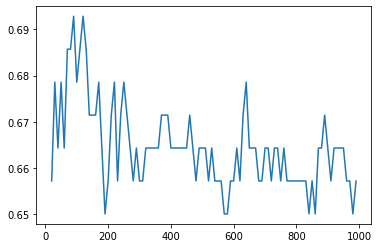

In [24]:
accuracies = []
ns = np.arange(20, 500, 20)
for n in ns:
    # Create and train the random forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_classifier.fit(x_trains, y_trains)

    # splitting across the samples
    # Predict on the test set
    y_pred = rf_classifier.predict(x_tests)

    # Calculate accuracy
    accuracy = accuracy_score(y_tests, y_pred)
    accuracies.append(accuracy)
    #print("Accuracy:", accuracy)
plt.plot(ns,accuracies)

In [27]:
from sklearn.model_selection import RandomizedSearchCV


rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(x_trains, y_trains)

random_params= {'n_estimators': np.arange(20, 500, 20),
                'max_features': ['auto', 'sqrt'],
                'max_depth': [*np.arange(3,50,5),None],
                'min_samples_split': np.arange(2,10),
                'bootstrap': [True, False]
               }
   
random_classifier = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_params, n_iter=1000, cv=3,verbose=1, random_state=42, n_jobs=-1)
random_classifier.fit(x_trains, y_trains)

y_pred = rf_classifier.predict(x_tests)
random_y_pred = random_classifier.best_estimator_.predict(x_tests)

accuracy = accuracy_score(y_tests, y_pred)
random_accuracy = accuracy_score(y_tests, random_y_pred)
print('base accuracy:', accuracy, 'random search accuracy:', random_accuracy, 'difference:', random_accuracy-accuracy)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
base accuracy: 0.6571428571428571 random search accuracy: 0.6928571428571428 difference: 0.0357142857142857


### start from concatenate version

In [23]:
# Extract features and target variable
X = concatenated_df.drop('status', axis=1)  # Features
X= X.rename(str,axis="columns") 
y = concatenated_df['status']  # Target variable

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [25]:
# concatenation
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6546762589928058


### Make a huge concatenated dataset of all datasets(without status) + concatenated dataset of disease status

In [18]:
#Every dataframe made is already sorted in numberical order for each species(column-wise)
#So lets Grab all the data points in each dataset but not the status
Feng = Feng_df.iloc[:,1:-1]
Yu = Yu_df.iloc[:,1:-1]
Hannigan = Hannigan_df.iloc[:,1:-1]
Vogtmann = Vogtmann_df.iloc[:,1:-1]
Zeller = Zeller_df.iloc[:,1:-1]
Thomas = Thomas_df.iloc[:,1:-1]

# Lets concatenate the dataframes
Abundance_df = pd.concat([Feng, Yu, Hannigan, Vogtmann, Zeller, Thomas])
Abundance_df = Abundance_df.reset_index(drop=True)
Abundance_df = Abundance_df.fillna(0)

# Make Status dataframe
Feng_status = Feng_df.iloc[:,-1]
Yu_status = Yu_df.iloc[:,-1]
Hannigan_status = Hannigan_df.iloc[:,-1]
Vogtmann_status = Vogtmann_df.iloc[:,-1]
Zeller_status = Zeller_df.iloc[:,-1]
Thomas_status = Thomas_df.iloc[:,-1]
Status_df = pd.concat([Feng_status,Yu_status,Hannigan_status,Vogtmann_status,Zeller_status,Thomas_status])
Status_df = Status_df.reset_index(drop=True)

# Ineed to generate code for training, test and then do batch for training =0 and batch for test = 1 and then perform pyCombat. We need to figure out if we are using Kfold cr
#cross valid or just train test split

In [19]:
# Add batch variable
#separate data into training and test 1st code {}

training['batch'] = 0
test['batch'] = 1
data_norm = pycombat
    
# Combine training and test data for ComBat normalization
data = pd.concat([training, test])
batch = data['batch']
data_norm = data.drop(columns='batch').T
# Apply ComBat normalization 
data_norm = pycombat(data_norm, batch)

training_norm = data_norm.iloc[:, :len(training)].T
training_norm['status'] = training_status
test_norm = data_norm.iloc[:, len(training):].T
test_norm['status'] = test_status


#Random Forest



NameError: name 'training' is not defined